In [1]:
import os
import sys
sys.path.insert(0,'..')

from bidst.transformers import SkullStrippingTransformer

In [2]:
!tree ../bidst/tests/data/ds114/

../bidst/tests/data/ds114/
├── sub-01
│   ├── ses-retest
│   │   └── anat
│   │       └── sub-01_ses-retest_T1w.nii.gz
│   └── ses-test
│       └── anat
│           └── sub-01_ses-test_T1w.nii.gz
├── sub-02
│   ├── ses-retest
│   │   └── anat
│   │       └── sub-02_ses-retest_T1w.nii.gz
│   └── ses-test
│       └── anat
│           └── sub-02_ses-test_T1w.nii.gz
├── sub-03
│   ├── ses-retest
│   │   └── anat
│   │       └── sub-03_ses-retest_T1w.nii.gz
│   └── ses-test
│       └── anat
│           └── sub-03_ses-test_T1w.nii.gz
└── sub-04
    ├── ses-retest
    │   └── anat
    │       └── sub-04_ses-retest_T1w.nii.gz
    └── ses-test
        └── anat
            └── sub-04_ses-test_T1w.nii.gz

20 directories, 8 files


In [3]:
project_path = os.path.abspath('..') + '/bidst/tests/data/ds114'
pipeline_name = 'test_skullstripping_ds114'
gather_steps = ('source', dict(extensions='T1w.nii.gz'))

IDS = ['02']

transformer = SkullStrippingTransformer(project_path=project_path,
                                        pipeline_name=pipeline_name,
                                        gather_steps=gather_steps)
transformer.fit_transform(IDS)

/work/soft/BIDSTransformers/bidst/tests/data/ds114/derivatives/test_skullstripping_ds114/steps/skullstripping/sub-02/ses-retest/anat/sub-02_ses-retest_T1w_brain.nii.gz
/work/soft/BIDSTransformers/bidst/tests/data/ds114/derivatives/test_skullstripping_ds114/steps/skullstripping/sub-02/ses-test/anat/sub-02_ses-test_T1w_brain.nii.gz


['02']

In [4]:
!tree ../bidst/tests/data/ds114/

../bidst/tests/data/ds114/
├── derivatives
│   └── test_skullstripping_ds114
│       └── steps
│           └── skullstripping
│               └── sub-02
│                   ├── ses-retest
│                   │   └── anat
│                   │       └── sub-02_ses-retest_T1w_brain.nii.gz
│                   └── ses-test
│                       └── anat
│                           └── sub-02_ses-test_T1w_brain.nii.gz
├── sub-01
│   ├── ses-retest
│   │   └── anat
│   │       └── sub-01_ses-retest_T1w.nii.gz
│   └── ses-test
│       └── anat
│           └── sub-01_ses-test_T1w.nii.gz
├── sub-02
│   ├── ses-retest
│   │   └── anat
│   │       └── sub-02_ses-retest_T1w.nii.gz
│   └── ses-test
│       └── anat
│           └── sub-02_ses-test_T1w.nii.gz
├── sub-03
│   ├── ses-retest
│   │   └── anat
│   │       └── sub-03_ses-retest_T1w.nii.gz
│   └── ses-test
│       └── anat
│           └── sub-03_ses-test_T1w.nii.gz
└── sub-04
    ├── ses-retest
    │   └── anat
    │       └── sub-04_ses-

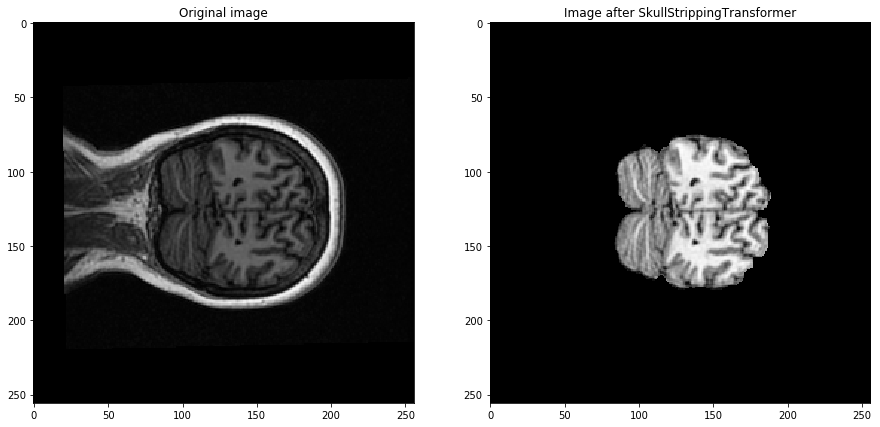

In [6]:
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

img_proc = nib.load('../bidst/tests/data/ds114/derivatives/test_skullstripping_ds114/steps/skullstripping/sub-02/ses-retest/anat/sub-02_ses-retest_T1w_brain.nii.gz')
img_orig = nib.load('../bidst/tests/data/ds114/sub-02/ses-retest/anat/sub-02_ses-retest_T1w.nii.gz')

check_slice = 36
plt.figure(figsize=(15, 30))
plt.subplot(121)
plt.title('Original image')
plt.imshow(img_orig.get_data()[:, check_slice, :], cmap='Greys_r')


plt.subplot(122)
plt.title('Image after SkullStrippingTransformer')
plt.imshow(img_proc.get_data()[:, check_slice, :], cmap='Greys_r')